<a href="https://colab.research.google.com/github/elyal2/UPC2023/blob/main/1_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Big Data Analytics and Machine Learning with NLP and Computer Vision**
# *Course Overview*
Welcome to our comprehensive course on Big Data Analytics and Machine Learning, where we'll delve into the fascinating realms of Natural Language Processing (NLP) and Computer Vision. This course is designed to equip you with the essential skills and knowledge needed to analyze, interpret, and glean insights from large datasets using advanced machine learning techniques.

Throughout this journey, we'll explore how machine learning can be applied to understand and process human languages and visual data, opening doors to numerous applications in various industries.


# **Understanding the Scope of Data Analytics in the Real World**
The real-world impact of data analytics spans various domains, from business strategy and operational efficiency to societal issues and technological advancements. In this context, data analytics is not just a technical discipline but a significant driver of innovation and strategic planning in the modern world. It involves collecting, processing, and analyzing vast amounts of data to uncover patterns, derive insights, and inform strategic decisions.

**Data Preprocessing and Cleaning**
> Real-World Application: In any analytics project, a significant amount of time is spent cleaning and preparing data. This process ensures the reliability and accuracy of the insights derived from the data. ***Keywords: ETL & ELT, early-arriving facts & late-arriving dimensions***.

**Exploratory Data Analysis (EDA)**
> Business Impact: EDA helps businesses understand their data's underlying patterns and trends, providing a foundation for informed decision-making and strategy development. ***Keywords: Tableau, PowerBI, QlikView***.

**Data Storage and Management**
> Industry Significance: Efficient data storage and management are crucial in handling the sheer volume of data generated daily. Organizations rely on robust systems to store, retrieve, and manage data seamlessly. ***Keywords: Datawarehouse, Data Lake, Event driven architecture***.

**Big Data Technologies**
> Technological Advancement: Tools have revolutionized how we handle and process big data, enabling real-time analytics and large-scale data processing. ***Keywords: Apache Hadoop, Spark***.

**Data Governance and Ethics**
> Societal Importance: With great power comes great responsibility. Data governance and ethics are at the forefront, ensuring data privacy, security, and ethical usage.

**Statistics and Probability**
> Analytical Backbone: A strong foundation in statistics is essential for interpreting data correctly and making predictions. It forms the backbone of most analytical methods.

**Basic Programming Skills**
> Toolbox for Analysts: Programming skills are indispensable tools for any data analyst, allowing them to manipulate and analyze data effectively. ***Keywords: Python, R***.

**Data Visualization**
> Communicating Insights: Data visualization is key to translating complex data into understandable and actionable insights, facilitating communication and decision-making.

**Cloud Computing**
> Infrastructure Flexibility: Cloud computing has provided scalable solutions for storing and analyzing data, offering flexibility and efficiency in data handling. ***Keywords: AWS, Azure***.


# **Time Series Forecasting**
Time series forecasting is a method used to predict future events or values by analyzing trends and patterns in the data collected over time. A time series is a sequence of data points that are typically collected or recorded at regular time intervals. Common examples include daily stock market prices, monthly electricity consumption, yearly sales figures, and so on. Time series analysis is crucial for understanding trends, forecasting future values, and making data-driven decisions.

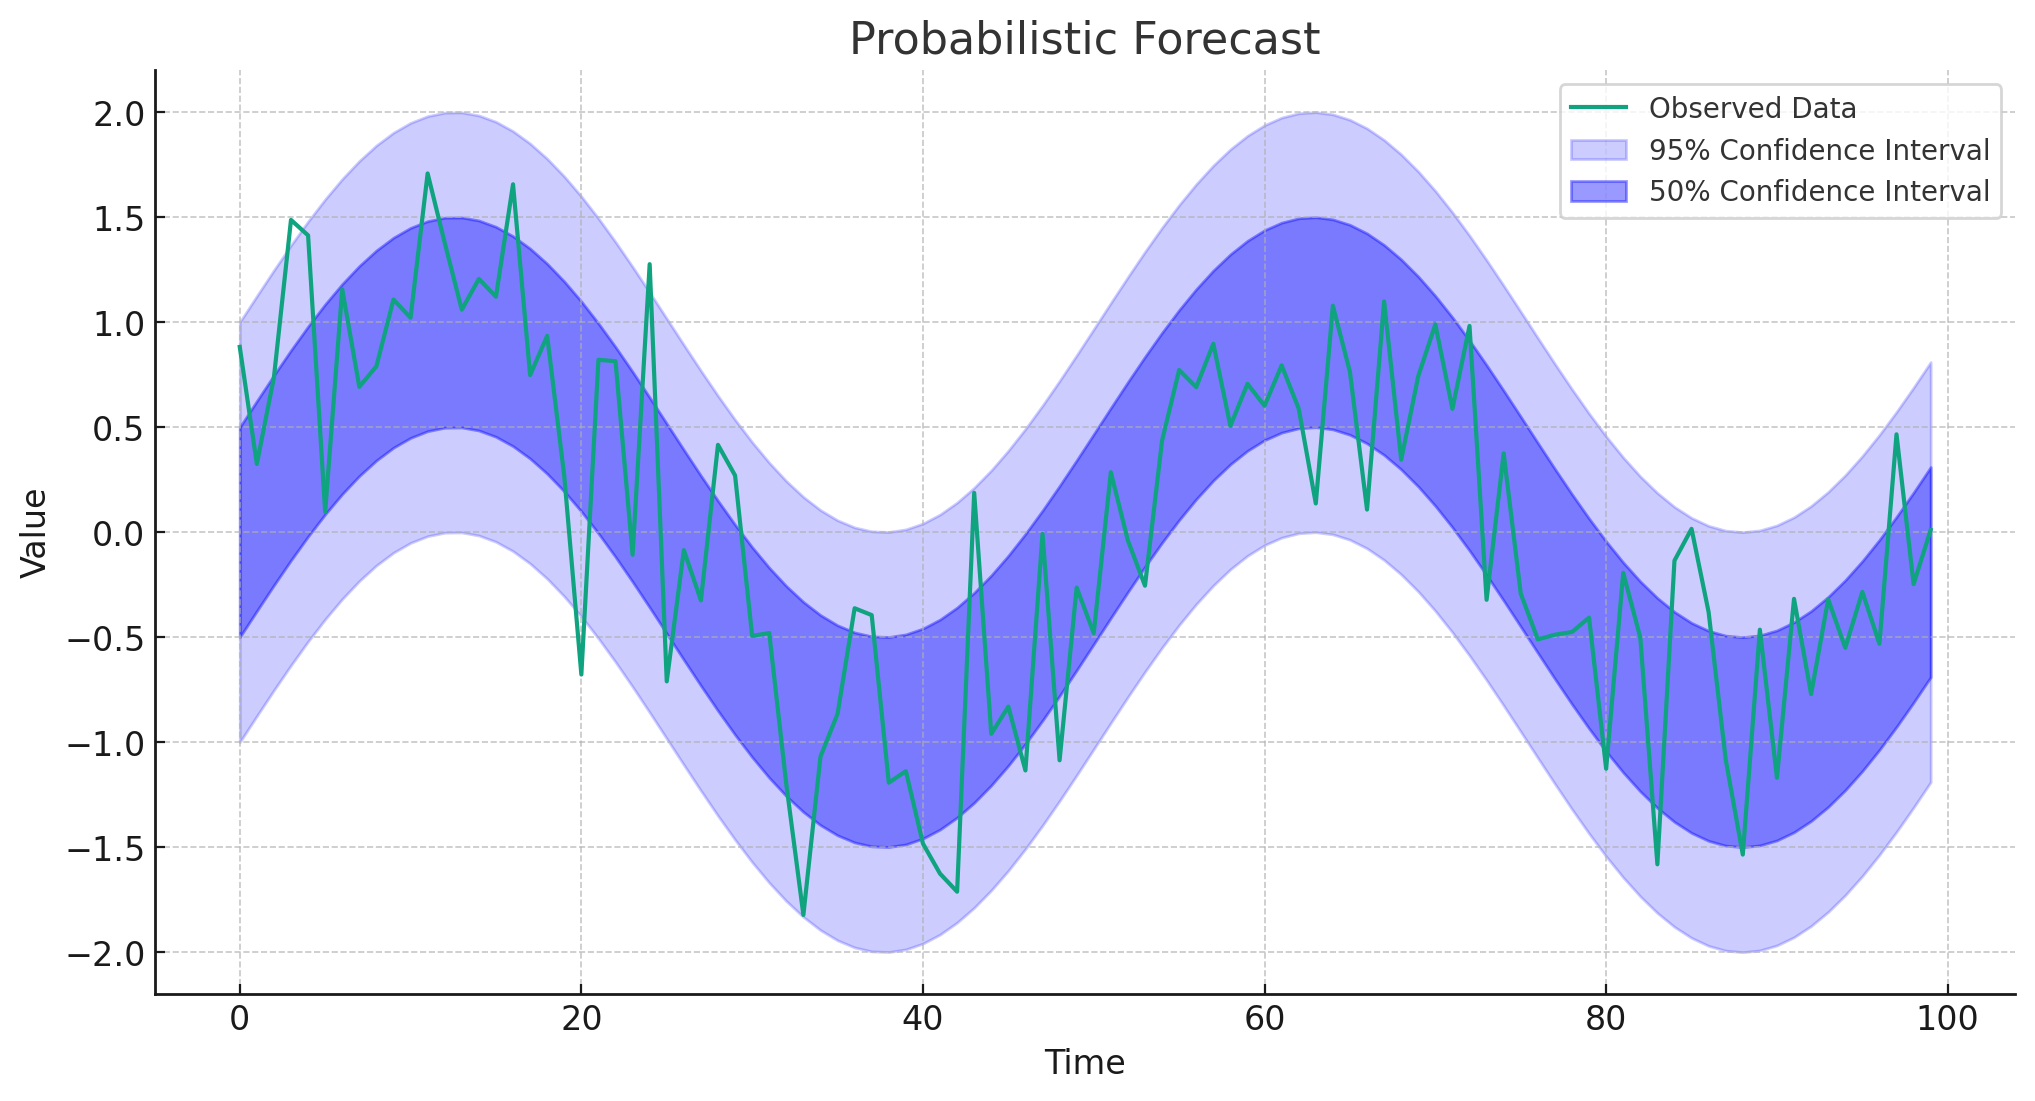




**Techniques Used in Time Series Forecasting**:
* Naive Approach: Assuming the next value will be the same as the last observed value.
Simple Average: Taking the average of all past data.
* Moving Average: Averaging the data over a specific window that slides over time.
* Exponential Smoothing: Giving more weight to recent observations while exponentially decreasing the weights for older observations.
* ARIMA (AutoRegressive Integrated Moving Average): A model that accounts for trends, seasonality, and noise by combining differencing (Integrated) with autoregression (AR) and a moving average (MA) model.
* SARIMA (Seasonal ARIMA): An extension of ARIMA that specifically models seasonality.
* Prophet: A model released by Facebook that's useful for datasets with strong seasonal effects and several seasons of historical data.
* Machine Learning: Using algorithms like Random Forests, Gradient Boosting, and Neural Networks for capturing complex nonlinear patterns in the data.


# **Lesson 1: Time Series Forecasting with Pandas and Prophet**
In our first lesson, we'll start by exploring time series data using Python's Pandas library and Facebook's Prophet tool.

We'll be working with a real-world dataset: the log of Peyton Manning's Wikipedia page views. Our goal is to forecast future traffic to this page using the data we have.
# *Code Walkthrough*

*   **Import Libraries**: We start by importing [pandas](https://pandas.pydata.org/), a powerful data manipulation library, and [Prophet](https://facebook.github.io/prophet/), a tool developed by Facebook (META) for forecasting with time series data.
*   **Load and View Data**: We load the dataset using pandas.read_csv(), which reads data from a CSV file into a DataFrame. We then use df.head() to preview the first few rows of our data.

In [3]:
# Importing necessary libraries
import pandas as pd
from prophet import Prophet

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
# Displaying the first few rows of the dataframe
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572




*   **Initialize and Fit Prophet Model**: We create an instance of the Prophet class and fit it to our dataset. Prophet models time series data, considering trends and seasonal patterns.
*   **Create Future DataFrame**: make_future_dataframe is used to extend our current dataset into the future for a specified number of periods (days in this case).


In [4]:
# Initializing the Prophet model
m = Prophet()
# Fitting the model with our dataset
m.fit(df)

# Creating a dataframe that extends about 10 years (10000 iterations by default)
# into the future considering a repeating period of 365 days
future = m.make_future_dataframe(periods=365)
# Displaying the last few rows of the future dataframe
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw81sevwz/hn9_dlad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw81sevwz/ce0k9g1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54591', 'data', 'file=/tmp/tmpw81sevwz/hn9_dlad.json', 'init=/tmp/tmpw81sevwz/ce0k9g1m.json', 'output', 'file=/tmp/tmpw81sevwz/prophet_model2cb42yqq/prophet_model-20231210111911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19




*   **Make Predictions**: Using the predict method of our Prophet model, we forecast future values for the dates in our extended dataframe.
*   **View Forecast**: We use slicing to view specific columns of our forecast, focusing on dates (ds), forecasted values (yhat), and the upper and lower bounds of the forecast's confidence intervals (yhat_lower and yhat_upper).



In [ ]:
# Making predictions using our model for the dates in the future dataframe
forecast = m.predict(future)
# Displaying the forecasted values and their confidence intervals
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.503808,8.894558
3266,2017-01-16,8.535122,7.747361,9.220538
3267,2017-01-17,8.322549,7.547190,9.018808
3268,2017-01-18,8.155179,7.395995,8.846969
3269,2017-01-19,8.167136,7.432058,8.871769




*   **Plotting the Forecast**: Finally, we visualize our forecast using m.plot(), which provides a graphical representation of the predicted values over time.



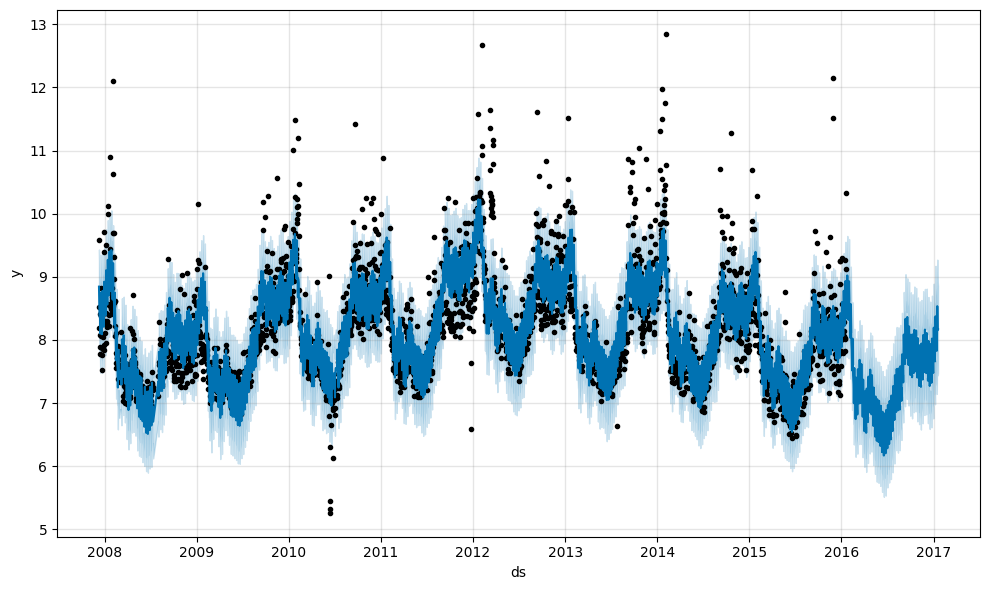

In [ ]:
# Plotting the forecast
fig1 = m.plot(forecast)

# **Extra info**

# *Prophet Library*
Prophet, developed by Facebook's Core Data Science team, is a library for forecasting time series data. It stands out due to its ease of use, flexibility, and ability to handle the peculiarities of business time series data. Key features that make Prophet particularly special include:

1.   Robust to Missing Data and Shifts in Trend: Prophet can handle missing data and is resilient to shifts in the trend, making it suitable for real-world datasets that are often imperfect.
2.   Handling of Seasonality: It can model annual, weekly, and daily seasonality, as well as holiday effects, which are common in business time series.
3.   Trend Change Points: Prophet automatically detects points in time where the time series have abrupt changes in their trajectories, allowing it to adapt to shifts in trends.
4.   Intuitive Parameters: Parameters in Prophet are intuitive (like growth rate, seasonality, and holiday effects) and don't require in-depth statistical knowledge to tune.
5.   Scalability and Speed: Prophet is designed to be fast and can handle a large number of time series.
6.   Open Source and Integrable: It’s an open-source tool and can easily integrate with other Python data analysis libraries, like Pandas and matplotlib, for pre-processing and visualization.

In summary, Prophet simplifies the process of forecasting by providing a practical and efficient tool that can handle the complexities and irregularities often found in real-world time series data.

Text(0.5, 1.0, '2014-2015 Peyton Manning Wikipedia Page Views')

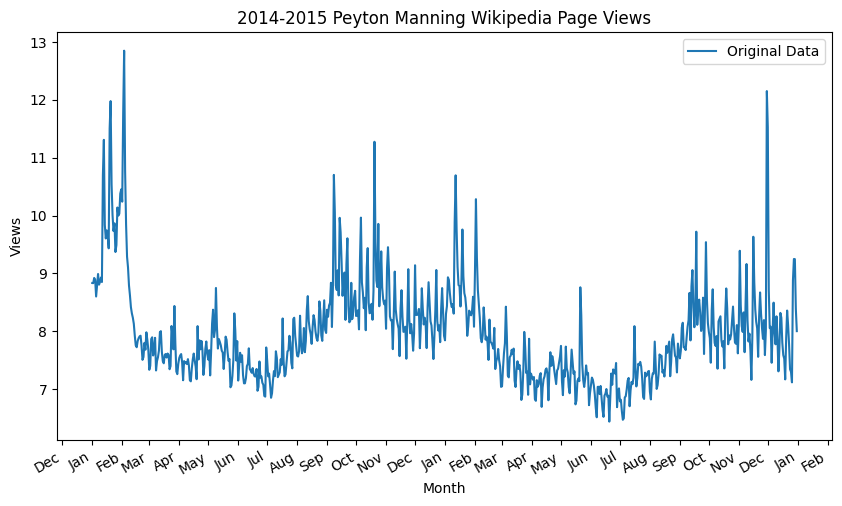

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Converting 'ds' to datetime format for better handling in matplotlib
df['ds'] = pd.to_datetime(df['ds'])
# Filtering the DataFrame for the years 2014 and 2015
df_2014_2015 = df[(df['ds'].dt.year == 2014) | (df['ds'].dt.year == 2015)]

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.plot(df_2014_2015['ds'], df_2014_2015['y'], label='Original Data')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Formatting x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())            # Setting major ticks to months
plt.gcf().autofmt_xdate()  # Auto-format the x-axis labels for better readability
plt.legend()
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('2014-2015 Peyton Manning Wikipedia Page Views')

# Bonus track

Le me introduce [Dash](https://dash.plotly.com/). Dash is an open-source framework for building data visualization interfaces. It will help build analytical web applications without requiring advanced web development knowledge.

Three technologies constitute the core of Dash:

* Flask supplies the web server functionality.
* React.js renders the user interface of the web page.
* Plotly.js generates the charts used in your application.

In [5]:
!pip install dash
!pip install dash-bootstrap-components
!pip install plotly
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 1.5 MB/s eta 0:00:00


We've just installed:

* dash: The core Dash framework.
* dash-bootstrap-components: Provides Bootstrap components to use with Dash.
* plotly: Plotly's Python graphing library, which is used for creating the visualizations.
* pandas: For data manipulation and analysis, used here to create and manipulate dataframes.

Now, it's time for some good magic 😃

In [6]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px
import random

# Generate simulated data for a transport company
num_records = 100
# Create random period data for 100 records
periods = [f'2023-Q{random.randint(1, 4)}' for _ in range(num_records)]
# Generate random origins from a list of cities
origins = [random.choice(['New York', 'San Francisco', 'Chicago', 'Houston', 'Miami']) for _ in range(num_records)]
# Generate random destinations from a list of cities
destinations = [random.choice(['Los Angeles', 'Dallas', 'Washington D.C.', 'Boston', 'Seattle']) for _ in range(num_records)]
# Randomly generate load values
load = [random.uniform(5.0, 50.0) for _ in range(num_records)]
# Randomly choose the type of load
load_type = [random.choice(['Pallets', 'ULD', 'Loose Cargo']) for _ in range(num_records)]
# Create a DataFrame from the generated data
df = pd.DataFrame({
    'Period': periods,
    'Origin': origins,
    'Destination': destinations,
    'Load (Tones)': load,
    'Type of Load': load_type
})

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define a pastel color palette for the charts
colors = px.colors.qualitative.Pastel

# Create various plotly express visualizations
fig_bar_period = px.bar(df, x='Period', title='Transports Per Period', color_discrete_sequence=colors)
fig_bar_load_type = px.bar(df, x='Type of Load', title='Transports by Type of Load', color_discrete_sequence=colors)
fig_pie_load_type = px.pie(df, names='Type of Load', title='Distribution of Types of Loads', color_discrete_sequence=colors)
fig_heatmap_origin_dest = px.density_heatmap(df, x='Origin', y='Destination', title='Origin & Destination Heatmap', color_continuous_scale=colors)

# Create a table to display the data
table_header = [html.Thead(html.Tr([html.Th(col) for col in df.columns]))]
rows = [html.Tr([html.Td(df.iloc[i][col]) for col in df.columns]) for i in range(min(len(df), 10))]
table_body = [html.Tbody(rows)]
table = dbc.Table(table_header + table_body, bordered=True, striped=True, hover=True)

# Define the layout of the app with different components
app.layout = dbc.Container([
    html.H1('Transport Company Dashboard', style={'font-family': 'Helvetica', 'fontSize': 24, 'textAlign': 'center'}),
    dbc.Row([
        dbc.Col(dcc.Graph(id='bar-chart-period', figure=fig_bar_period, style={'font-size': 12}), width=6),
        dbc.Col(dcc.Graph(id='bar-chart-load-type', figure=fig_bar_load_type, style={'font-size': 12}), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='pie-chart-load-type', figure=fig_pie_load_type, style={'font-size': 12}), width=6),
        dbc.Col(dcc.Graph(id='heatmap-origin-destination', figure=fig_heatmap_origin_dest, style={'font-size': 12}), width=6),
    ]),
    dbc.Row([
        dbc.Col(html.Div(id='table', children=table, style={'font-size': 12}), width={'size': 10, 'offset': 1}),
    ])
], fluid=True)

# Run the app in debug mode
if __name__ == '__main__':
    app.run()


<IPython.core.display.Javascript object>